In [ ]:
!pip install tf2onnx

In [ ]:
!pip install onnxruntime opencv-python pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [ ]:
import tensorflow as tf
import os

base_dir = '/content/drive/MyDrive/AI_Scrap_Sorting_Project/data/dataset-resized'


# The model we'll use (MobileNet) prefers 224x224 images
IMG_SIZE = (224, 224)
BATCH_SIZE = 32 # Process images in batches of 32

**Load and Split the Data**

In [ ]:
# Create the training dataset (80% of the data)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

# Create the validation dataset (20% of the data)
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


**VISUALISATION**

The class names are: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


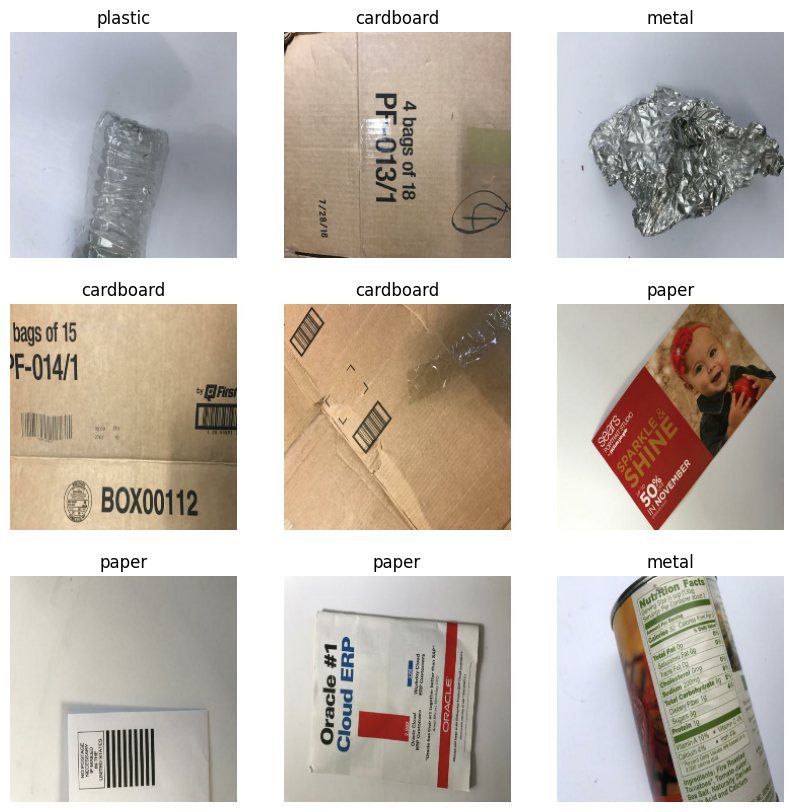

In [ ]:
import matplotlib.pyplot as plt

class_names = train_dataset.class_names
print("The class names are:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Configure Dataset for Performance**

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

#Set Up the Pre-Trained Model

In [ ]:

base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

# Get the number of classes
num_classes = len(class_names)

In [ ]:
# Create the new model
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#MODEL TRAINING

In [ ]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3634 - loss: 1.5812 - val_accuracy: 0.5861 - val_loss: 1.1203
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.6038 - loss: 1.0876 - val_accuracy: 0.6297 - val_loss: 0.9837
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6709 - loss: 0.9426 - val_accuracy: 0.6594 - val_loss: 0.9442
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.6892 - loss: 0.8903 - val_accuracy: 0.6634 - val_loss: 0.9368
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7219 - loss: 0.8317 - val_accuracy: 0.6693 - val_loss: 0.8916
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7369 - loss: 0.7694 - val_accuracy: 0.6931 - val_loss: 0.8791
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7535 - loss: 0.7473 - val_accuracy: 0.6772 - val_loss: 0.8461
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7522 - loss: 0.7074 - val_accuracy: 0.7010 - val_loss

#Visualize Training Performance

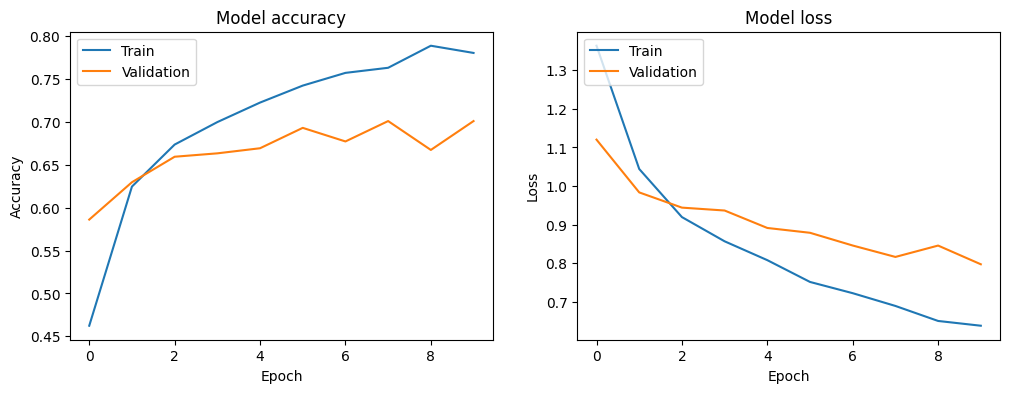

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# EVALUATION WITH METRICS


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 878ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 940ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 901ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 869ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.84      0.77      0.81        83
       glass       0.61      0.79      0.69       103
       metal       0.72      0.56      0.63        78
       paper       0.73      0.85      0.78       124
     plastic       0.69      0.57      0.62        88
       trash       0.50      0.34      0.41

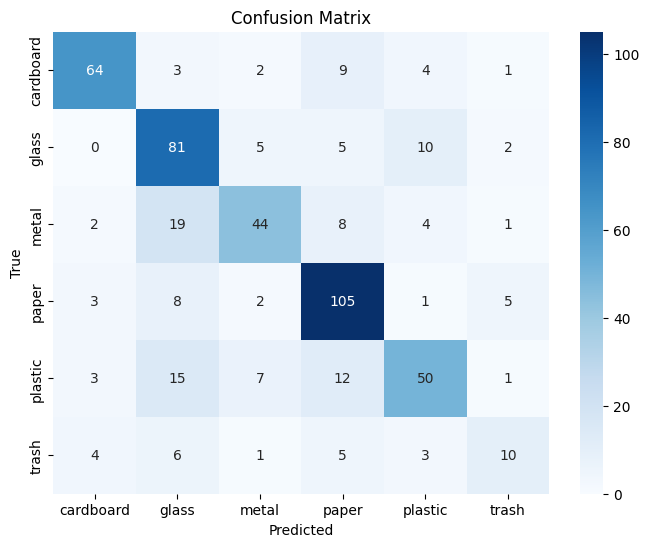

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predictions from the validation set
y_true = []
y_pred = []

for images, labels in validation_dataset:
    y_true.extend(labels.numpy())
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))


labels_to_report = list(range(len(class_names)))


# Generate and print the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, labels=labels_to_report))



cm = confusion_matrix(y_true, y_pred, labels=labels_to_report)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Define the path to save the model

In [ ]:

model_path = '/content/drive/MyDrive/AI_Scrap_Sorting_Project/models/scrap_classifier_v1.keras'

# Save the model
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to /content/drive/MyDrive/AI_Scrap_Sorting_Project/models/scrap_classifier_v1.keras


In [ ]:
import tensorflow as tf
import tf2onnx
import os


keras_model_path = '/content/drive/MyDrive/AI_Scrap_Sorting_Project/models/scrap_classifier_v1.keras'
onnx_model_path = '/content/drive/MyDrive/AI_Scrap_Sorting_Project/models/scrap_classifier_v1.onnx'


model = tf.keras.models.load_model(keras_model_path)

# Define the exact input shape and type for the converter
input_signature = [tf.TensorSpec([None, 224, 224, 3], tf.float32, name='input')]


@tf.function
def serving_fn(input):
    return model(input)

tf2onnx.convert.from_function(serving_fn, input_signature=input_signature, output_path=onnx_model_path, opset=13)


print(f"Model successfully converted and saved to {onnx_model_path}")

ERROR:tf2onnx.tfonnx:rewriter <function rewrite_constant_fold at 0x7de3be01b880>: exception `np.cast` was removed in the NumPy 2.0 release. Use `np.asarray(arr, dtype=dtype)` instead.


Model successfully converted and saved to /content/drive/MyDrive/AI_Scrap_Sorting_Project/models/scrap_classifier_v1.onnx


**ADDING TEST DATA IMAGES**

In [ ]:
# Define the base path to your dataset
base_data_path = '/content/drive/MyDrive/AI_Scrap_Sorting_Project/data/'

#  Create the test_images folder
!mkdir -p '{base_data_path}/test_images'

#  Copied a few example files from the correct folder
!cp '{base_data_path}/dataset-resized/metal/metal10.jpg' '{base_data_path}/test_images/'
!cp '{base_data_path}/dataset-resized/paper/paper20.jpg' '{base_data_path}/test_images/'
!cp '{base_data_path}/dataset-resized/plastic/plastic30.jpg' '{base_data_path}/test_images/'


print("Images copied to test_images folder:")
!ls '{base_data_path}/test_images'

Images copied to test_images folder:
metal10.jpg  paper20.jpg  plastic30.jpg


In [ ]:
# Change directory to  /src folder, then run the script
%cd /content/drive/MyDrive/AI_Scrap_Sorting_Project/src/
!python simulate.py

/content/drive/MyDrive/AI_Scrap_Sorting_Project/src
--- Starting Scrap Classifier Simulation ---
Image: metal10.jpg -> Predicted: glass | Confidence: 0.4689
  -> WARNING: Low confidence prediction!
Image: paper20.jpg -> Predicted: paper | Confidence: 0.9901
Image: plastic30.jpg -> Predicted: cardboard | Confidence: 0.6614
  -> WARNING: Low confidence prediction!

--- Simulation Complete ---
Results saved to ../results/results.csv
